In [17]:
import sys
sys.path.append('..')  # Go up one directory from notebooks/ to project root

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import pandas as pd

# Local imports
from src.styles import style_config
from src.top_players import get_top_players

# Get player data for plot

In [18]:
# Load data
data = pd.read_csv('../data/summary.csv')

# Get top players
top_players = get_top_players(data, n=2)

# Create scatter plot

Show all players on a scatter plot: xD per 90 v danger passes per 90

Text(0, 0, "xD is a 'danger score' that tells us how likely a pass is to create a real scoring threat.")

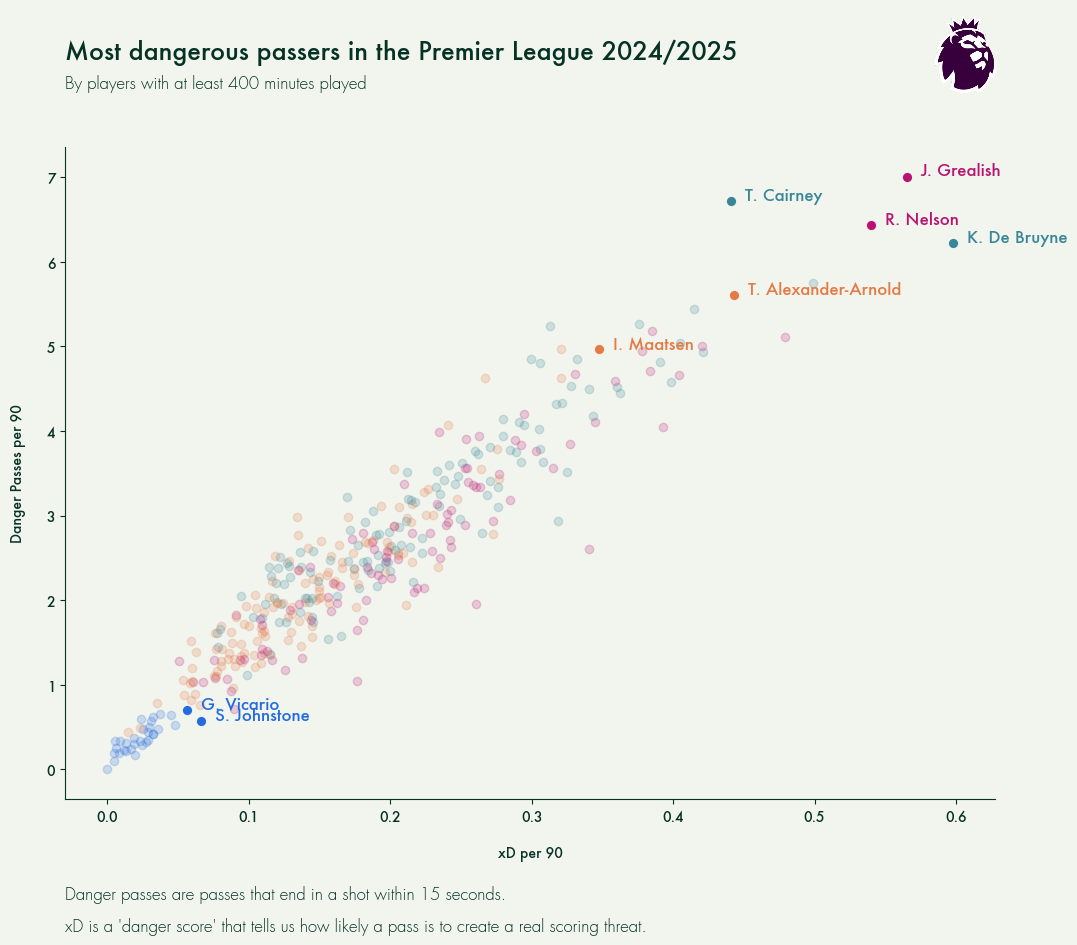

In [20]:
# Apply styling
plt.rcParams['font.family'] = style_config['font_prop'].get_name()
plt.rcParams.update({
    'text.color': style_config['colors']['dark'],
    'axes.labelcolor': style_config['colors']['dark'],
    'axes.edgecolor': style_config['colors']['dark'],
    'xtick.color': style_config['colors']['dark'],
    'ytick.color': style_config['colors']['dark'],
    'grid.color': style_config['colors']['dark'],
    'figure.facecolor': style_config['colors']['background'],
    'axes.facecolor': style_config['colors']['background'],
})

# Create figure
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(3, 1, height_ratios=[0.1, 0.8, 0.1])      # 3 rows, 1 column, with height ratios for title, plot, legend

# Init axis
heading_ax = fig.add_subplot(gs[0])
main_ax = fig.add_subplot(gs[1])
legend_ax = fig.add_subplot(gs[2])

# Hide axis
heading_ax.axis('off')
legend_ax.axis('off')

# Hide spines
main_ax.spines['top'].set_visible(False)
main_ax.spines['right'].set_visible(False)

# Title
heading_ax.text(
    0, 0.5, 
    'Most dangerous passers in the Premier League 2024/2025', 
    fontsize=style_config['sizes']['h1'], 
    ha='left', 
    va='center'
)

# Subtitle
heading_ax.text(
    0, 0, 
    'By players with at least 400 minutes played',  
    fontsize=style_config['sizes']['p'], 
    ha='left', 
    va='bottom',
    fontproperties=style_config['font_prop_light']
)

# PL logo
logo_path = '../assets/pl-logo.png'
logo = mpimg.imread(logo_path)
imagebox = OffsetImage(logo, zoom=0.25)
ab = AnnotationBbox(
    imagebox, 
    (1, 0),                     # location of annotation box
    xycoords='axes fraction',   # use axes fraction coordinates: relative to axes and percentage of axes for position
    box_alignment=(1, 0),       # alignment of the annotation box: (1, 0) means right-aligned and bottom-aligned
    frameon=False               # don't show the frame of the annotation box
)
heading_ax.add_artist(ab)

# Set main axis labels
main_ax.set_xlabel('xD per 90', labelpad=15)
main_ax.set_ylabel('Danger Passes per 90', labelpad=15)

# Plot data
for i, row in data.iterrows():
    color = style_config['colors'][row['role'].lower()]
    main_ax.scatter(row['xD_per_90'], row['danger_passes_per_90'], color=color, alpha=style_config['alpha'])

# Highlight top players
for i, row in top_players.iterrows():
    color = style_config['colors'][row['role'].lower()]
    main_ax.scatter(row['xD_per_90'], row['danger_passes_per_90'], color=color, alpha=1, s=30)
    main_ax.text(
        row['xD_per_90'] + 0.01, row['danger_passes_per_90'] + 0.01, 
        row['short_name'], 
        color=color, 
        fontsize=style_config['sizes']['p'], 
    )

# Danger pass and xD explanation in legend
legend_ax.text(
    0, 0.5, 
    'Danger passes are passes that end in a shot within 15 seconds.',
    fontproperties=style_config['font_prop_light'],
    fontsize=style_config['sizes']['p'], 
    ha='left', 
    va='center'
)

legend_ax.text(
    0, 0, 
    'xD is a \'danger score\' that tells us how likely a pass is to create a real scoring threat.',
    fontproperties=style_config['font_prop_light'],
    fontsize=style_config['sizes']['p'], 
    ha='left', 
    va='bottom'
)